<a href="https://colab.research.google.com/github/Maheshwar405/Maheshwar-Reddy_INFO5731_Fall2023/blob/main/Boyalla_MaheshwarReddy_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
# Write your code here
#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/ma

In [2]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [3]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)  # Pass options directly here
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)

for num in range(4):
    driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
    listOfReviews = driver.find_elements(By.CLASS_NAME, "text")

for ele, sub_ele in zip(listOfTitle, listOfReviews):
    title_array.append((ele.text).replace('\n', ''))
    review_array.append(sub_ele.text)

df = pd.DataFrame(list(zip(title_array, review_array)), columns=['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
print(df)


Length of data frame is 124
                                                 Title  \
0        I would not call it a masterpiece as some did   
1        Not a spoon feeding of CGI fueled faux drama.   
2                               The King of Tragedy...   
3                             Perfect in every aspect.   
4    A psychological study, rather than a superhero...   
..                                                 ...   
119           Makes The Dark Knight seem light-hearted   
120                       Not As Good As Everyone Says   
121                                    Joke of a movie   
122  Disturbing, Riveting, Off-The-Chart Performanc...   
123      This is not just a movie, it's an experience!   

                                                Review  
0                                                       
1    The movie affects you in a way that makes it p...  
2    Arthur Fleck's a guy with lofty aspirations, w...  
3    Truly a masterpiece, The Best Hollywood fi

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [5]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

<ipython-input-5-aa3036b0293a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')


In [6]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [10]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('director', 'told', 'phillip'): 7, ('taxi', 'driver', 'king'): 6, ('driver', 'king', 'comedi'): 6, ('robert', 'de', 'no'): 5, ('joaquin', 'phoenix', 'play'): 5, ('one', 'best', 'move'): 5, ('dark', 'knight', 'trilog'): 4, ('comic', 'book', 'movi'): 4, ('joaquin', 'phoenix', 'perform'): 4, ('scorses', 'taxi', 'driver'): 3, ...})

In [11]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))


Streaming output truncated to the last 5000 lines.
('might', 'felt'):0.07692307692307693
('like', 'shoehorn'):0.01818181818181818
('shoehorn', 'plotlin'):1.0
('plotlin', 'play'):1.0
('play', 'proper'):0.058823529411764705
('proper', 'support'):0.2
('support', 'main'):0.2
('main', 'stori'):0.1
('stori', 'transit'):0.029411764705882353
('transit', 'arthur'):0.25
('arthur', 'joke'):0.02040816326530612
('joke', 'mix'):0.00625
('mix', 'good'):0.2
('good', 'thing'):0.04
('thing', 'movi'):0.08333333333333333
('movi', 'wa'):0.005128205128205128
('wa', 'psychic'):0.125
('psychic', 'horror'):0.5
('horror', 'vice'):0.25
('vice', 'could'):1.0
('could', 'origin'):0.04
('origin', 'like'):0.06666666666666667
('like', 'mani'):0.01818181818181818
('mani', 'other'):0.041666666666666664
('other', 'point'):0.125
('point', 'similar'):0.05263157894736842
('similar', 'taxi'):0.3333333333333333
('driver', 'score'):0.043478260869565216
('score', 'want'):0.045454545454545456
('want', 'copi'):0.03448275862068965

In [12]:
whole_dataset = ''
index = []
i = 1
for line in df['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [13]:
import nltk
nltk.download('brown')
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in df['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in df['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


,physic pain experi good way,arthur fleck guy lofti aspir,laugh disturb foundat,realli funni aunt,unlik arthur wont laugh,fit aspir,televis lit dispatch torment glee substanti hetti fee guarante wont leav bit,schadenfreud thing,chuckl stori,truli masterpiec,...,light colorshu apertur,eg bone scene frame,joaquin tap,dark corner util uniqu act instinct,charact phoenix act,leav noth tabl,score phoenix alli,produc truli legendari,transform film god,anoth actor
Review-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [14]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf

<ipython-input-14-b750f7f9eeca>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
<ipython-input-14-b750f7f9eeca>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
<ipython-input-14-b750f7f9eeca>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

,token,0,1,2,3,4,5,6,7,8,...,114,115,116,117,118,119,120,121,122,123
0,,0.0,0.244136,0.068239,0.055855,0.035297,0.110774,0.058163,0.081918,0.093937,...,0.036551,0.0,0.056983,0.04126,0.197304,0.014948,0.051332,0.197304,0.043671,0.0
1,committed,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,morality,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,music,0.0,0.000000,0.000000,0.055855,0.000000,0.110774,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,cash,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,attitude,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.04126,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2713,score,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058163,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.014948,0.000000,0.000000,0.043671,0.0
2714,choice,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2715,visceral,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
query_sentence = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english')
X_set = {w for w in X_list if not w in sw}

In [18]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector:
      if w in X_set: l1.append(1)
      else: l1.append(0)
      if w in Y_set: l2.append(1)
      else: l2.append(0)
  return rvector, l1, l2

In [19]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)):
        c+= l1[i]*l2[i]
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine

In [20]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,,None
1,The movie affects you in a way that makes it p...,0.058124
2,"Arthur Fleck's a guy with lofty aspirations, w...",0.0
3,"Truly a masterpiece, The Best Hollywood film o...",0.0
4,I have seen Joker yesterday at Venice an early...,0.030268
...,...,...
119,Joker is the latest iteration of the Clown Pri...,0.02985
120,"First and foremost, it looks gorgeous.\n\nI lo...",0.056574
121,Joaquin Phoenix just playing Joaquin Phoenix. ...,0.049568
122,Joaquin Phoenix produces one of the most memor...,0.017047


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [21]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 8 no

In [22]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [24]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome(options=options)  # Pass options directly here
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)

for num in range(4):
    driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
    time.sleep(5)
    listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
    listOfReviews = driver.find_elements(By.CLASS_NAME, "text")

for ele, sub_ele in zip(listOfTitle, listOfReviews):
    title_array.append((ele.text).replace('\n', ''))
    review_array.append(sub_ele.text)

df = pd.DataFrame(list(zip(title_array, review_array)), columns=['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
print(df)


Length of data frame is 124
                                                 Title  \
0        I would not call it a masterpiece as some did   
1        Not a spoon feeding of CGI fueled faux drama.   
2                               The King of Tragedy...   
3                             Perfect in every aspect.   
4    A psychological study, rather than a superhero...   
..                                                 ...   
119           Makes The Dark Knight seem light-hearted   
120                       Not As Good As Everyone Says   
121                                    Joke of a movie   
122  Disturbing, Riveting, Off-The-Chart Performanc...   
123      This is not just a movie, it's an experience!   

                                                Review  
0                                                       
1    The movie affects you in a way that makes it p...  
2    Arthur Fleck's a guy with lofty aspirations, w...  
3    Truly a masterpiece, The Best Hollywood fi

In [25]:
list2 = []
for i in df.index:
    y = str(df["Review"][i]).split()
    list2.append(y)

In [27]:
from gensim.models import Word2Vec
model2 = Word2Vec(list2)
print(model2)

Word2Vec<vocab=459, vector_size=100, alpha=0.025>


In [31]:
words2 = list(model2.wv.index_to_key)
words2

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'that',
 'in',
 'I',
 'it',
 'this',
 'movie',
 'for',
 'as',
 'The',
 'but',
 'with',
 'was',
 'not',
 'be',
 'are',
 'his',
 'Joker',
 'film',
 'you',
 'by',
 'on',
 'so',
 'from',
 'Joaquin',
 'have',
 'Phoenix',
 'all',
 "it's",
 'about',
 'This',
 'or',
 'he',
 'an',
 'what',
 'It',
 'one',
 'character',
 'like',
 'into',
 'just',
 'will',
 'more',
 'at',
 'than',
 'really',
 'people',
 'performance',
 'good',
 'we',
 'can',
 'see',
 'feel',
 'some',
 'get',
 'would',
 'Arthur',
 'if',
 'think',
 'And',
 "It's",
 'very',
 'has',
 'its',
 'how',
 'they',
 'who',
 'no',
 'your',
 'even',
 'it.',
 'say',
 'only',
 'But',
 'much',
 'best',
 'which',
 'story',
 'comic',
 '-',
 'time',
 'because',
 'movie.',
 'him',
 'do',
 'great',
 'been',
 'movie,',
 'Phillips',
 'me',
 'Todd',
 'movies',
 'other',
 'up',
 'does',
 'should',
 'A',
 'out',
 'acting',
 'seen',
 'also',
 'such',
 'make',
 'dark',
 'my',
 'being',
 'Batman',
 'Oscar',
 'any',
 

In [34]:
from sklearn.decomposition import PCA

# Get the vectors and corresponding words
vectors = [model2.wv[word] for word in model2.wv.index_to_key]
words = model2.wv.index_to_key

# Fit a 2D PCA model
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)


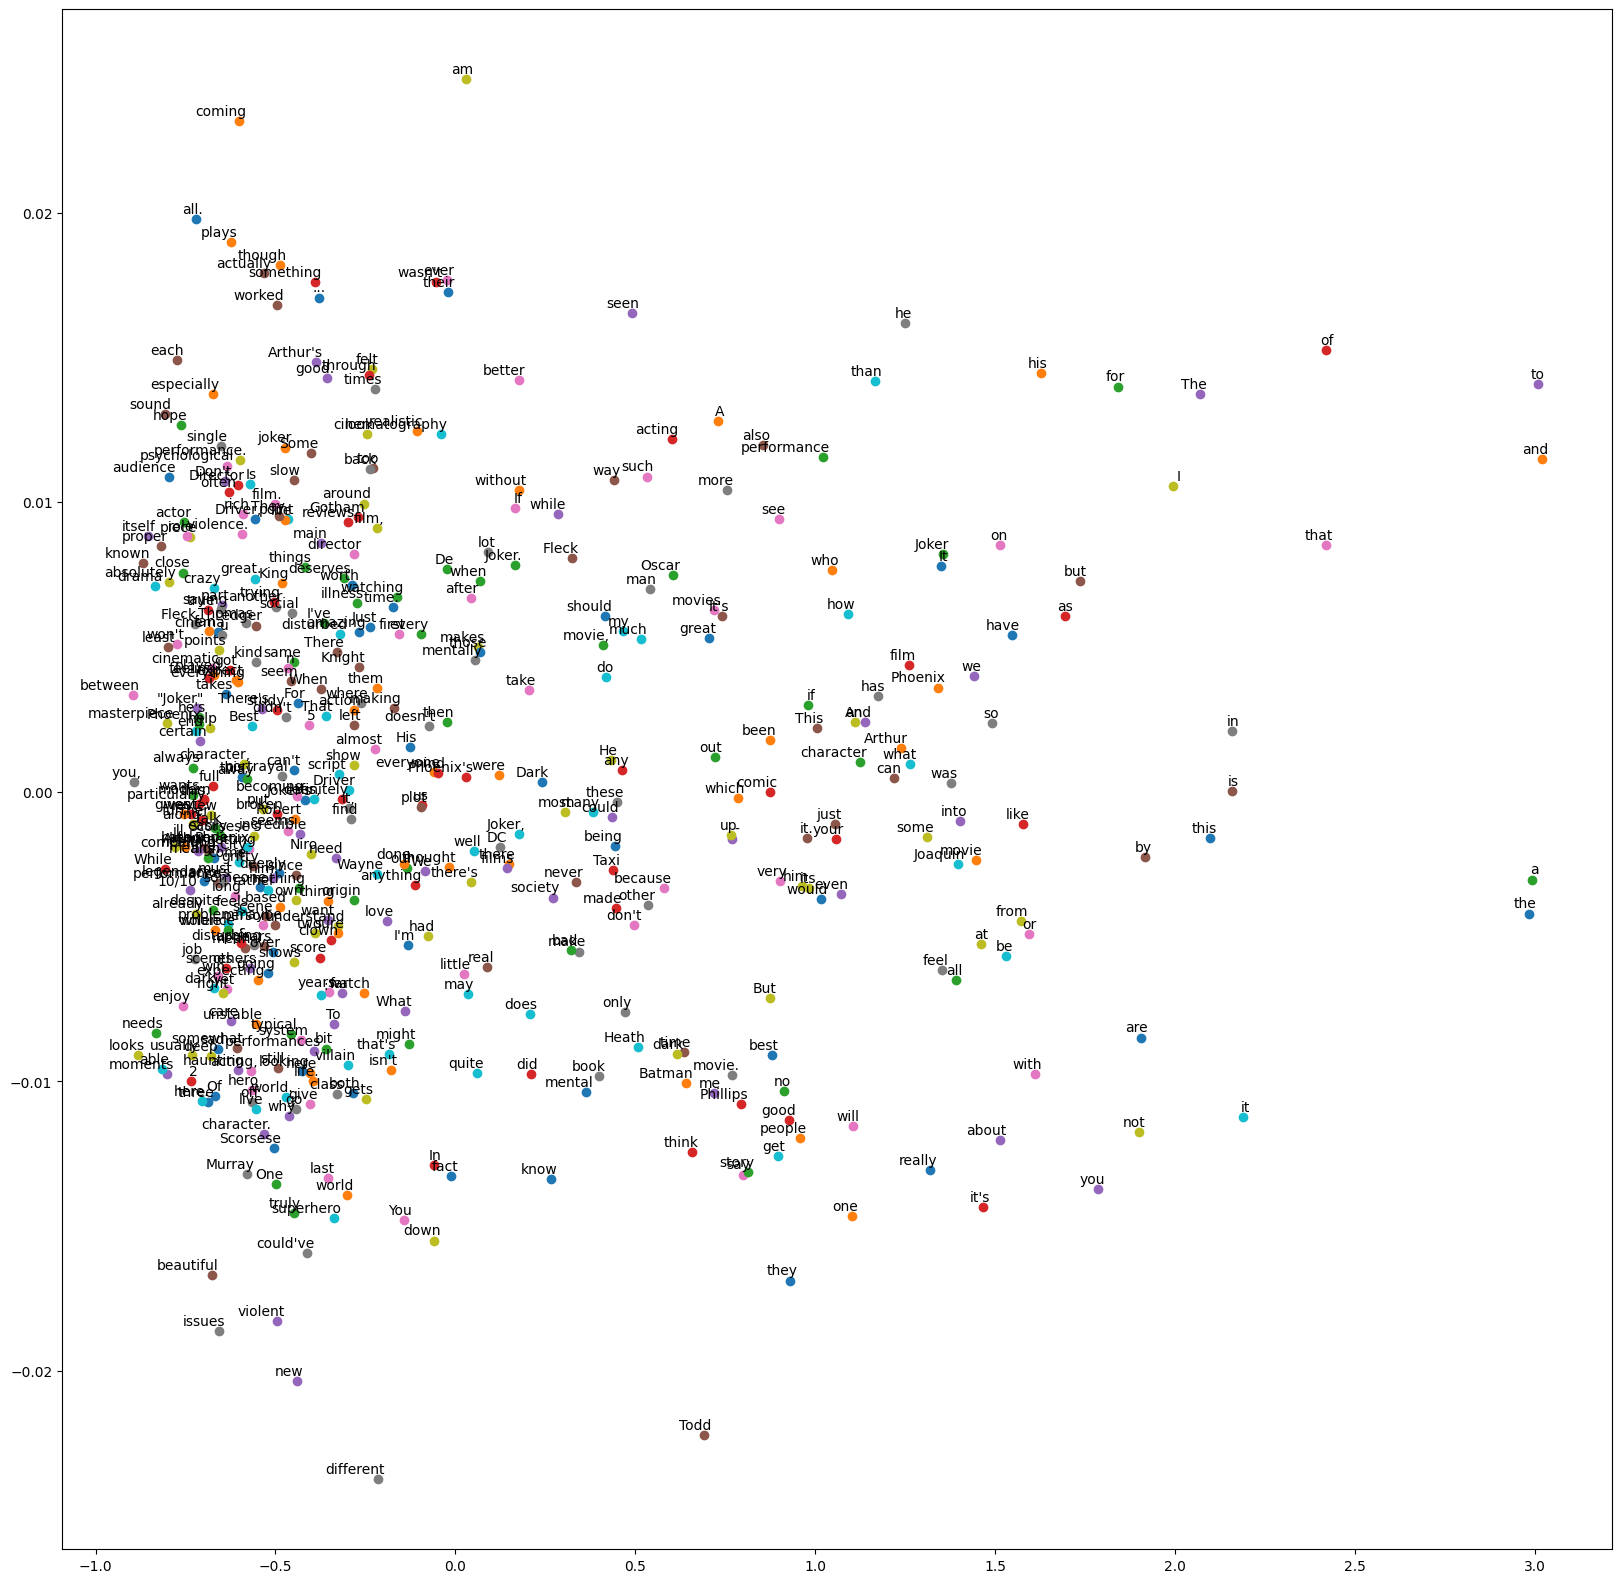

In [36]:
'''# create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure (figsize = (20,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for word, (x, y) in zip(model2.wv.index_to_key, result):
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [39]:
# The GitHub link of your final csv file



# Link: https://github.com/Maheshwar405/Maheshwar-Reddy_INFO5731_Fall2023/blob/main/review.csv



